# Multilayer perceptron (Neural networks)

In this script we use the multilayer perceptron to simulate a rainfall-runoff process. The demonstration part consits in the loading of data and the implementation in a very simplistic dataset. Your work is to beat the current performance by modifying the NN, based on the syntax here provided, changing the inputs, modifying the loss function, or tunning of the NN hyper parameters.

To carry out this tutorial you will have to install the latest version (developer) hosted in github

For this you should type `pip install git+git://github.com/scikit-learn/scikit-learn.git` in the cmd. After the installation make sure to restart your python session. make sure installation is working correctly.

reference to the NN regressor is on http://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [89]:
# So the plots appear in the results
%pylab inline  

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor  # importing the multi-layer perceptron

Populating the interactive namespace from numpy and matplotlib


In [90]:
f_data = 'brue_data.csv'

# have to keep in mind [Rt, Et, Ret, Qt]
data_np = np.loadtxt(f_data, delimiter=',', skiprows=1, usecols=[1, 2, 3, 4])

# inputs of the ANN are precipitation, evapotranspiration and qt-1
inp = np.transpose(np.vstack([data_np[1:, 0], data_np[:-1, 3]]))
out = data_np[1:, 0]

# separate into training and validation
per_train = 0.7
len_train = int(len(inp)*per_train)

In [91]:
## make nse function
def nse(x,y,j=2.0):
    """
    =========================
    Nash-Sutcliffe Efficiency
    =========================

    Parameters
    ----------
    Performance Functions
    x - calculated value
    y - recorded value
    j - exponent to modify the inflation of the variance (standard NSE j=2)
    """
    a = np.sum(np.power(x-y,j))
    b = np.sum(np.power(y-np.average(y),j))
    F = 1.0 - a/b
    return F


In [92]:
# input parsing
inp_train = inp[:len_train, :]
inp_val = inp[len_train:, :]

out_train = out[:len_train]
out_val = out[len_train:]

In [93]:
# input regularisation
# rank_inp = np.max(inp, 0) - np.min(inp, 0)
# min_inp = np.min(inp, 0)
# rank_out = np.max(out, 0) - np.min(out, 0)
# min_out = np.min(out, 0)

# inputs
# inp_train = np.array([[(inp[i, j] - min_inp[j])/rank_inp[j] 
#                        for i in xrange(len_train)] for j in xrange(len(inp[0]))])

# inp_val = np.array([[(inp[i, j] - min_inp[j])/rank_inp[j] 
#                        for i in xrange(len_train, len(inp))] for j in xrange(len(inp[0]))])

# # Outputs
# out_train = np.array([(out[i] - min_out)/rank_out for i in xrange(len_train)])

# out_val = np.array([(out[i] - min_out)/rank_out for i in xrange(len_train, len(out))])

In [94]:
# Training of the NN. Minimises the squarred loss

nn = MLPRegressor(hidden_layer_sizes=(15, ), activation='logistic', solver='sgd', 
                  alpha=0.0001, batch_size='auto', learning_rate='constant', 
                  learning_rate_init=0.001, power_t=0.5, max_iter=200, 
                  shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                  warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
                  beta_2=0.999, epsilon=1e-08)

nn.fit(inp_train, out_train)
q_nn_tr = nn.predict(inp_train)
q_nn_val = nn.predict(inp_val)
# print result of squarred error
print('nse training: {0:.3f}'.format(nse(q_nn_tr, out_train)))
print('nse validation: {0:.3f}'.format(nse(q_nn_val, out_val)))

nse training: 0.832
nse validation: 0.907


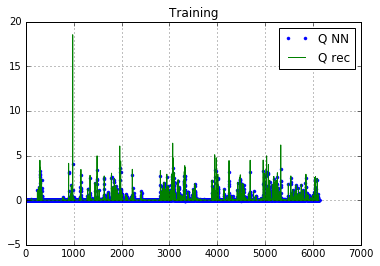

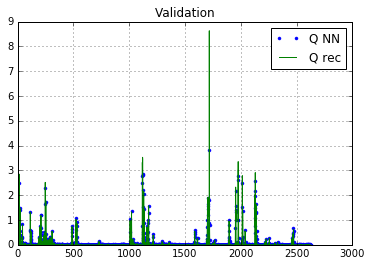

In [95]:
# results
plt.figure()
plt.title('Training')
plt.plot(q_nn_tr, '.', label='Q NN')
plt.plot(out_train, label='Q rec')
plt.legend()
plt.grid()

plt.figure()
plt.title('Validation')
plt.plot(q_nn_val, '.', label='Q NN')
plt.plot(out_val, label='Q rec')
plt.legend()
plt.grid()
plt.show()